<a href="https://colab.research.google.com/github/chinanuj/DNA-Alignment-and-De-Brujin-Graphs/blob/main/DNA_ALIGNMENT_AND_PARALLEL_PROCESSING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install Bio
! pip install toyplot

In [ ]:
import toyplot
import random
from typing import Set
from collections import defaultdict
from Bio import SeqIO
import csv
from Bio import pairwise2
from Bio.Seq import Seq
import random
import time
import matplotlib.pyplot as plt

In [ ]:
def generate_debruijn_edges_and_nodes(fasta_file):
    sequences = []

    with open(fasta_file, 'r') as file:
        lines = file.readlines()
        for line in lines:
            if line.startswith('>'):
                continue
            sequences.append(line.strip())

    edges: Set[tuple] = set()
    nodes: Set[str] = set()

    # Create a dictionary to store the outgoing edges for each node
    outgoing_edges = defaultdict(list)

    for sequence in sequences:
        for i in range(len(sequence) - 1):
            edge = (sequence[i], sequence[i+1])
            edges.add(edge)
            nodes.add(sequence[i])
            nodes.add(sequence[i+1])
            outgoing_edges[sequence[i]].append(sequence[i+1])

    # Find the starting node for the Eulerian path
    start_node = None
    for node in nodes:
        if len(outgoing_edges[node]) > 0 and len(outgoing_edges[node]) != len(nodes):
            start_node = node
            break

    # If no starting node is found, choose any node with outgoing edges
    if start_node is None:
        start_node = next(iter(nodes))

    # Perform the Eulerian path algorithm
    eulerian_path = []
    stack = [start_node]

    while stack:
        current_node = stack[-1]

        if outgoing_edges[current_node]:
            next_node = outgoing_edges[current_node].pop(0)
            stack.append(next_node)
        else:
            eulerian_path.append(stack.pop())

    # Reverse the Eulerian path to get the correct order
    eulerian_path.reverse()

    return edges, nodes, eulerian_path

# Example usage
fasta_file = 'sequence.fasta'
edges, nodes, eulerian_path = generate_debruijn_edges_and_nodes(fasta_file)

print("De Bruijn Edges:")
ed=[]
for edge in edges:
    ed.append(edge)
print(ed)

print("\nDe Bruijn Nodes:")
nd=[]
for node in nodes:
    nd.append(node)
print(nd)

print("\nEulerian Path:")
eu=[]
for node in eulerian_path:
    eu.append(node)
print(eu)

De Bruijn Edges:
[('A', 'M'), ('V', 'G'), ('T', 'Q'), ('V', 'T'), ('T', 'T'), ('Q', 'M'), ('E', 'Q'), ('E', 'Y'), ('D', 'V'), ('S', 'R'), ('M', 'D'), ('N', 'N'), ('G', 'S'), ('P', 'Q'), ('N', 'F'), ('I', 'L'), ('K', 'Q'), ('K', 'G'), ('A', 'A'), ('K', 'T'), ('N', 'Q'), ('Q', 'H'), ('A', 'V'), ('K', 'R'), ('S', 'N'), ('Q', 'V'), ('Y', 'Y'), ('H', 'M'), ('S', 'F'), ('V', 'N'), ('R', 'Y'), ('T', 'N'), ('S', 'D'), ('F', 'S'), ('L', 'C'), ('T', 'D'), ('H', 'S'), ('F', 'V'), ('I', 'F'), ('V', 'Y'), ('A', 'G'), ('Q', 'P'), ('A', 'T'), ('D', 'E'), ('I', 'T'), ('G', 'A'), ('W', 'M'), ('Q', 'A'), ('M', 'C'), ('M', 'H'), ('G', 'E'), ('Y', 'S'), ('F', 'L'), ('W', 'S'), ('T', 'K'), ('V', 'K'), ('D', 'L'), ('G', 'W'), ('H', 'G'), ('A', 'N'), ('Y', 'V'), ('H', 'T'), ('C', 'V'), ('S', 'S'), ('Q', 'W'), ('P', 'K'), ('P', 'M'), ('R', 'V'), ('D', 'R'), ('M', 'K'), ('M', 'M'), ('L', 'V'), ('L', 'I'), ('G', 'Q'), ('G', 'G'), ('E', 'S'), ('G', 'T'), ('H', 'R'), ('G', 'L'), ('N', 'K'), ('N', 'M'), ('V', 'H')

In [ ]:
def plot_debruijn_graph(edges, width=500, height=500):
    "returns a toyplot graph from an input of edges"
    graph = toyplot.graph(
        [i[0] for i in edges],
        [i[1] for i in edges],
        width=width,
        height=height,
        tmarker=">",
        vsize=25,
        vstyle={"stroke": "black", "stroke-width": 2, "fill": "none"},
        vlstyle={"font-size": "11px"},
        estyle={"stroke": "black", "stroke-width": 2},
        layout=toyplot.layout.FruchtermanReingold(edges=toyplot.layout.CurvedEdges()))
    return graph

In [ ]:
# print the cyclic binary string represented by the de Bruijn graph
print(edges)

# plot the graph
plot_debruijn_graph(edges);

{('A', 'M'), ('V', 'G'), ('T', 'Q'), ('V', 'T'), ('T', 'T'), ('Q', 'M'), ('E', 'Q'), ('E', 'Y'), ('D', 'V'), ('S', 'R'), ('M', 'D'), ('N', 'N'), ('G', 'S'), ('P', 'Q'), ('N', 'F'), ('I', 'L'), ('K', 'Q'), ('K', 'G'), ('A', 'A'), ('K', 'T'), ('N', 'Q'), ('Q', 'H'), ('A', 'V'), ('K', 'R'), ('S', 'N'), ('Q', 'V'), ('Y', 'Y'), ('H', 'M'), ('S', 'F'), ('V', 'N'), ('R', 'Y'), ('T', 'N'), ('S', 'D'), ('F', 'S'), ('L', 'C'), ('T', 'D'), ('H', 'S'), ('F', 'V'), ('I', 'F'), ('V', 'Y'), ('A', 'G'), ('Q', 'P'), ('A', 'T'), ('D', 'E'), ('I', 'T'), ('G', 'A'), ('W', 'M'), ('Q', 'A'), ('M', 'C'), ('M', 'H'), ('G', 'E'), ('Y', 'S'), ('F', 'L'), ('W', 'S'), ('T', 'K'), ('V', 'K'), ('D', 'L'), ('G', 'W'), ('H', 'G'), ('A', 'N'), ('Y', 'V'), ('H', 'T'), ('C', 'V'), ('S', 'S'), ('Q', 'W'), ('P', 'K'), ('P', 'M'), ('R', 'V'), ('D', 'R'), ('M', 'K'), ('M', 'M'), ('L', 'V'), ('L', 'I'), ('G', 'Q'), ('G', 'G'), ('E', 'S'), ('G', 'T'), ('H', 'R'), ('G', 'L'), ('N', 'K'), ('N', 'M'), ('V', 'H'), ('T', 'H'), ('Q

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="500.0px" height="500.0px" viewBox="0 0 500.0 500.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="te9c8819c4aee4016b968fc0e932f241d"> A C D E F G H I K L M N P Q R S T V W Y

In [ ]:
def generate_debruijn_edges_and_nodes(fasta_file):
    sequences = []

    with open(fasta_file, 'r') as file:
        lines = file.readlines()
        for line in lines:
            if line.startswith('>'):
                continue
            sequences.append(line.strip())

    edges: Set[tuple] = set()
    nodes: Set[str] = set()

    # Create a dictionary to store the outgoing edges for each node
    outgoing_edges = defaultdict(list)

    for sequence in sequences:
        for i in range(len(sequence) - 1):
            edge = (sequence[i], sequence[i+1])
            edges.add(edge)
            nodes.add(sequence[i])
            nodes.add(sequence[i+1])
            outgoing_edges[sequence[i]].append(sequence[i+1])

    # Find the starting node for the Eulerian path
    start_node = None
    for node in nodes:
        if len(outgoing_edges[node]) > 0 and len(outgoing_edges[node]) != len(nodes):
            start_node = node
            break

    # If no starting node is found, choose any node with outgoing edges
    if start_node is None:
        start_node = next(iter(nodes))

    # Perform the Eulerian path algorithm
    eulerian_path = []
    stack = [start_node]

    while stack:
        current_node = stack[-1]

        if outgoing_edges[current_node]:
            next_node = outgoing_edges[current_node].pop(0)
            stack.append(next_node)
        else:
            eulerian_path.append(stack.pop())

    # Reverse the Eulerian path to get the correct order
    eulerian_path.reverse()

    return edges, nodes, eulerian_path

def generate_overlapping_graph(edges):
    overlapping_graph = defaultdict(list)
    for edge in edges:
        overlapping_graph[edge[0]].append(edge[1])
    return overlapping_graph

def find_hamiltonian_path(graph, start_node):
    path = [start_node]
    visited = set([start_node])

    def dfs(node):
        if len(path) == len(graph):
            return True
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                path.append(neighbor)
                if dfs(neighbor):
                    return True
                visited.remove(neighbor)
                path.pop()
        return False

    if dfs(start_node):
        return path
    else:
        return None

# Example usage
fasta_file = 'sequence.fasta'
edges, nodes, eulerian_path = generate_debruijn_edges_and_nodes(fasta_file)

print("De Bruijn Edges:")
ed=[]
for edge in edges:
    ed.append(edge)
print(ed)

print("\nDe Bruijn Nodes:")
nd=[]
for node in nodes:
    nd.append(node)
print(nd)

print("\nEulerian Path:")
eu=[]
for node in eulerian_path:
    eu.append(node)
print(eu)

overlapping_graph = generate_overlapping_graph(edges)
hamiltonian_path = find_hamiltonian_path(overlapping_graph, eulerian_path[0])

print("\nOverlapping Graph:")
for node, neighbors in overlapping_graph.items():
    for neighbor in neighbors:
        print(f"( {node} , {neighbor} ) ",end="")

print()

print("\nHamiltonian Path:")
if hamiltonian_path:
  hp=[]
  for node in hamiltonian_path:
      hp.append(node)
  print(hp)

else:
    print("No Hamiltonian Path found.")


De Bruijn Edges:
[('A', 'M'), ('V', 'G'), ('T', 'Q'), ('V', 'T'), ('T', 'T'), ('Q', 'M'), ('E', 'Q'), ('E', 'Y'), ('D', 'V'), ('S', 'R'), ('M', 'D'), ('N', 'N'), ('G', 'S'), ('P', 'Q'), ('N', 'F'), ('I', 'L'), ('K', 'Q'), ('K', 'G'), ('A', 'A'), ('K', 'T'), ('N', 'Q'), ('Q', 'H'), ('A', 'V'), ('K', 'R'), ('S', 'N'), ('Q', 'V'), ('Y', 'Y'), ('H', 'M'), ('S', 'F'), ('V', 'N'), ('R', 'Y'), ('T', 'N'), ('S', 'D'), ('F', 'S'), ('L', 'C'), ('T', 'D'), ('H', 'S'), ('F', 'V'), ('I', 'F'), ('V', 'Y'), ('A', 'G'), ('Q', 'P'), ('A', 'T'), ('D', 'E'), ('I', 'T'), ('G', 'A'), ('W', 'M'), ('Q', 'A'), ('M', 'C'), ('M', 'H'), ('G', 'E'), ('Y', 'S'), ('F', 'L'), ('W', 'S'), ('T', 'K'), ('V', 'K'), ('D', 'L'), ('G', 'W'), ('H', 'G'), ('A', 'N'), ('Y', 'V'), ('H', 'T'), ('C', 'V'), ('S', 'S'), ('Q', 'W'), ('P', 'K'), ('P', 'M'), ('R', 'V'), ('D', 'R'), ('M', 'K'), ('M', 'M'), ('L', 'V'), ('L', 'I'), ('G', 'Q'), ('G', 'G'), ('E', 'S'), ('G', 'T'), ('H', 'R'), ('G', 'L'), ('N', 'K'), ('N', 'M'), ('V', 'H')

In [ ]:
def generate_overlap_edges(sequences, k):
    overlaps = defaultdict(list)
    for i, seq1 in enumerate(sequences):
        for j, seq2 in enumerate(sequences):
            if i != j:
                if seq1.endswith(seq2[:k]):
                    overlaps[i].append(j)
    return overlaps

def generate_overlapping_graph(edges):
    overlapping_graph = defaultdict(list)
    for edge in edges:
        overlapping_graph[edge[0]].append(edge[1])
    return overlapping_graph

def find_hamiltonian_path(graph, start_node):
    path = [start_node]
    visited = set([start_node])

    def dfs(node):
        if len(path) == len(graph):
            return True
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                path.append(neighbor)
                if dfs(neighbor):
                    return True
                visited.remove(neighbor)
                path.pop()
        return False

    if dfs(start_node):
        return path
    else:
        return None

def plot_graph_with_hamiltonian_path(sequences, hamiltonian_path):
    canvas = toyplot.Canvas(width=800, height=600)
    graph = toyplot.graph(
        [i for i in range(len(sequences))],
        [],
        width=800,
        height=600,
        tmarker=">",
        vsize=25,
        vstyle={"stroke": "black", "stroke-width": 2, "fill": "none"},
        vlstyle={"font-size": "11px"},
        estyle={"stroke": "black", "stroke-width": 2},
        layout=toyplot.layout.FruchtermanReingold(edges=toyplot.layout.CurvedEdges()))

    # Plot Hamiltonian path
    for i in range(len(hamiltonian_path) - 1):
        graph.add_edge(hamiltonian_path[i], hamiltonian_path[i+1], color="blue")

    return canvas

# Load FASTA sequences
sequences = []
for record in SeqIO.parse("sequence.fasta", "fasta"):
    sequences.append(str(record.seq))

# Generate overlap graph
overlapping_graph = generate_overlap_edges(sequences, k=10)

# Convert overlap graph to format used by find_hamiltonian_path
edges = [(str(i), str(j)) for i in overlapping_graph for j in overlapping_graph[i]]
graph = generate_overlapping_graph(edges)

# Find Hamiltonian path
start_node = '0'  # You can change the starting node if needed
hamiltonian_path = find_hamiltonian_path(graph, start_node)

# Plot graph with Hamiltonian path
if hamiltonian_path:
    canvas = plot_graph_with_hamiltonian_path(sequences, hamiltonian_path)
    canvas.show()
else:
    print("No Hamiltonian Path found.")

No Hamiltonian Path found.


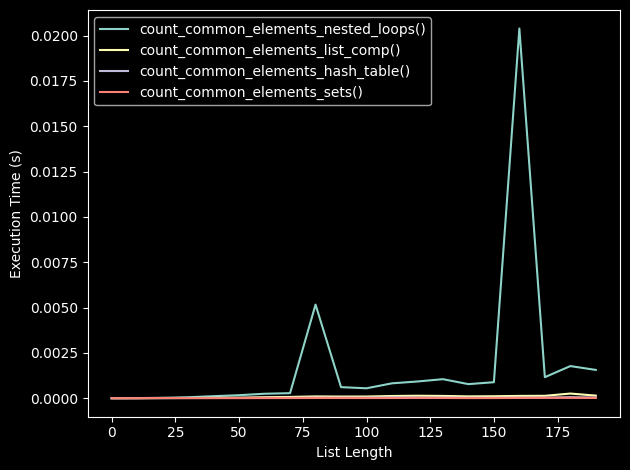

In [ ]:
MAX_LEN = 200  # Maximum length of input list.


def count_common_elements_nested_loops(l1, l2):
    common_elements = []
    count = 0
    for v in l1:
        for w in l2:
            if w == v:
                common_elements.append(w)
                count += 1
    return count


def count_common_elements_list_comp(l1, l2):
    common_elements = [x for x in l1 if x in l2]
    return len(common_elements)


def count_common_elements_sets(l1, l2):
    common_elements = set(l1).intersection(l2)
    return len(common_elements)


def count_common_elements_hash_table(l1, l2):
    table = {}
    common_elements = []
    for v in l1:
        table[v] = True
    count = 0
    for w in l2:
        if table.get(w):  # Avoid KeyError that would arise with table[w]
            common_elements.append(w)
            count += 1
    return count


if __name__ == "__main__":

    # Initialise results containers
    lengths_nested = []
    times_nested = []
    lengths_comp = []
    times_comp = []
    lengths_hash_table = []
    times_hash_table = []
    lengths_sets = []
    times_sets = []

    for length in range(0, MAX_LEN, 10):
        # Generate random lists
        l1 = [random.randint(0, 99) for _ in range(length)]
        l2 = [random.randint(0, 99) for _ in range(length)]

        # Time execution for nested lists version
        start = time.perf_counter()
        count_common_elements_nested_loops(l1, l2)
        end = time.perf_counter()

        # Store results
        lengths_nested.append(length)
        times_nested.append(end - start)

        # Time execution for list comprehension version
        start = time.perf_counter()
        count_common_elements_list_comp(l1, l2)
        end = time.perf_counter()

        # Store results
        lengths_comp.append(length)
        times_comp.append(end - start)

        # Time execution for hash table version
        start = time.perf_counter()
        count_common_elements_hash_table(l1, l2)
        end = time.perf_counter()

        # Store results
        lengths_hash_table.append(length)
        times_hash_table.append(end - start)

        # Time execution for sets version
        start = time.perf_counter()
        count_common_elements_sets(l1, l2)
        end = time.perf_counter()

        # Store results
        lengths_sets.append(length)
        times_sets.append(end - start)

    # Plot results
    plt.style.use("dark_background")
    plt.figure().canvas.manager.set_window_title("Common List Elements Algorithm - Time Complexity")
    plt.xlabel("List Length")
    plt.ylabel("Execution Time (s)")
    plt.plot(lengths_nested, times_nested, label="count_common_elements_nested_loops()")
    plt.plot(lengths_comp, times_comp, label="count_common_elements_list_comp()")
    plt.plot(lengths_hash_table, times_hash_table, label="count_common_elements_hash_table()")
    plt.plot(lengths_sets, times_sets, label="count_common_elements_sets()")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
def read_fasta(filename):
    sequences = {}
    current_sequence = ''
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('>'):
                if current_sequence:
                    sequences[sequence_id] = current_sequence
                sequence_id = line.strip()[1:]
                current_sequence = ''
            else:
                current_sequence += line.strip()
        sequences[sequence_id] = current_sequence
    return sequences

def compute_substrings(genetic_sequence, length):
    substrings = []
    for i in range(len(genetic_sequence) - length + 1):
        substrings.append(genetic_sequence[i:i+length])
    return substrings

def write_to_csv(substrings, filename):
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["Substring"])
        for substring in substrings:
            writer.writerow([substring])

def read_csv(filename):
    substrings = []
    with open(filename, 'r') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # Skip header
        for row in reader:
            substrings.append(row[0])
    return substrings

def check_substrings(genetic_sequence, csv_filename):
    csv_substrings = read_csv(csv_filename)
    correct_substrings = []
    incorrect_substrings = []
    for csv_substring in csv_substrings:
        alignment = pairwise2.align.localms(str(genetic_sequence), csv_substring, 2, -1, -0.5, -0.1)
        best_alignment = max(alignment, key=lambda x: x[2])
        aligned_genetic_sequence = best_alignment[0][best_alignment[3]:best_alignment[4]]
        aligned_csv_substring = best_alignment[1][best_alignment[3]:best_alignment[4]]
        if aligned_genetic_sequence == aligned_csv_substring:
            correct_substrings.append(csv_substring)
        else:
            incorrect_substrings.append(csv_substring)
    return correct_substrings, incorrect_substrings

def main():
    filename = 'Drosophilia.fasta'
    sequences = read_fasta(filename)

    sequence_id = input("Enter the sequence ID: ")
    if sequence_id not in sequences:
        print("Sequence ID not found.")
        return

    genetic_sequence = Seq(sequences[sequence_id])

    while True:
        try:
            length = int(input("Enter the length of the substring: "))
            if length <= 0:
                break
            substrings = compute_substrings(genetic_sequence, length)
            print(f"Substrings of length {length}:\n{substrings}")
            csv_filename = f"{sequence_id}_substrings.csv"
            write_to_csv(substrings, csv_filename)
            print(f"Substrings written to {csv_filename}")

            # Check correctness of substrings
            correct_substrings, incorrect_substrings = check_substrings(genetic_sequence, csv_filename)
            if incorrect_substrings:
                print("Incorrect Substrings:")
                for incorrect_substring in incorrect_substrings:
                    print(incorrect_substring)
            else:
                print("All substrings are correct.")

        except ValueError:
            print("Invalid input. Please enter a valid integer.")
        except KeyboardInterrupt:
            print("\nExiting.")
            break

if __name__ == "__main__":
    main()


In [ ]:
from Bio import pairwise2
from Bio.Seq import Seq

# Test the function
seq1 = "SEND"
seq2 = "AND"

# Perform global alignment
global_alignments = pairwise2.align.globalxx(seq1, seq2)

# Print global alignments
print("Global Alignments")
for alignment in global_alignments:
    print(pairwise2.format_alignment(*alignment))

# Perform local alignment
local_alignments = pairwise2.align.localxx(seq1, seq2)

print("Local Alignments")
# Print local alignments
for alignment in local_alignments:
    print(pairwise2.format_alignment(*alignment))

Global Alignments
SE-ND
   ||
--AND
  Score=2

SEND
 .||
-AND
  Score=2

SEND
. ||
A-ND
  Score=2

Local Alignments
3 ND
  ||
2 ND
  Score=2



In [ ]:
def needleman_wunsch(seq1, seq2, match_score=1, mismatch_score=-1, gap_score=-2):
    # Needleman-Wunsch algorithm implementation
    m, n = len(seq1), len(seq2)
    score_matrix = [[0] * (n+1) for _ in range(m+1)]
    traceback_matrix = [[''] * (n+1) for _ in range(m+1)]

    for i in range(m+1):
        score_matrix[i][0] = i * gap_score
        traceback_matrix[i][0] = '↑'  # vertical traceback
    for j in range(n+1):
        score_matrix[0][j] = j * gap_score
        traceback_matrix[0][j] = '←'  # horizontal traceback

    for i in range(1, m+1):
        for j in range(1, n+1):
            match = score_matrix[i-1][j-1] + (match_score if seq1[i-1] == seq2[j-1] else mismatch_score)
            delete = score_matrix[i-1][j] + gap_score
            insert = score_matrix[i][j-1] + gap_score
            max_score = max(match, delete, insert)
            score_matrix[i][j] = max_score

            if max_score == match:
                traceback_matrix[i][j] = '↖'
            elif max_score == delete:
                traceback_matrix[i][j] = '↑'
            else:
                traceback_matrix[i][j] = '←'

    align1, align2, alignment_string = '', '', ''
    i, j = m, n
    while i > 0 and j > 0:
        if traceback_matrix[i][j] == '↖':
            align1 += seq1[i-1]
            align2 += seq2[j-1]
            alignment_string += '|' if seq1[i-1] == seq2[j-1] else '.'
            i -= 1
            j -= 1
        elif traceback_matrix[i][j] == '↑':
            align1 += seq1[i-1]
            align2 += '-'
            alignment_string += ' '
            i -= 1
        elif traceback_matrix[i][j] == '←':
            align1 += '-'
            align2 += seq2[j-1]
            alignment_string += ' '
            j -= 1

    while i > 0:
        align1 += seq1[i-1]
        align2 += '-'
        alignment_string += ' '
        i -= 1
    while j > 0:
        align1 += '-'
        align2 += seq2[j-1]
        alignment_string += ' '
        j -= 1

    align1 = align1[::-1]
    align2 = align2[::-1]
    alignment_string = alignment_string[::-1]
    alignment_score = score_matrix[m][n]

    # Calculate similarity percentage
    matching_chars = sum(1 for a, b in zip(align1, align2) if a == b and a != '-')
    alignment_length = len(align1) - align1.count('-')
    similarity_percentage = (matching_chars / alignment_length) * 100 if alignment_length != 0 else 0



    # Print the score matrix
    print("Score Matrix:")
    for row in score_matrix:
        print(' '.join(map(str, row)))
    print("\nTraceback Matrix:")
    for row in traceback_matrix:
        print(' '.join(row))
    print("\nAlignment:")
    return align1, alignment_string, align2, alignment_score, similarity_percentage

# Input sequences
seq1 = "FDGFDGFDFGDGFDDCCFFTFYTFYTYTYTFYTFYFYFY"
seq2 = "ANHBHBHJVHGCFCHGVHJVGHCGD"

# Get alignment
alignment = needleman_wunsch(seq1, seq2)
print(f"{alignment[0]}\n{alignment[1]}\n{alignment[2]}\n  Score={alignment[3]}")


Score Matrix:
0 -2 -4 -6 -8 -10 -12 -14 -16 -18 -20 -22 -24 -26 -28 -30 -32 -34 -36 -38 -40 -42 -44 -46 -48 -50
-2 -1 -3 -5 -7 -9 -11 -13 -15 -17 -19 -21 -23 -23 -25 -27 -29 -31 -33 -35 -37 -39 -41 -43 -45 -47
-4 -3 -2 -4 -6 -8 -10 -12 -14 -16 -18 -20 -22 -24 -24 -26 -28 -30 -32 -34 -36 -38 -40 -42 -44 -44
-6 -5 -4 -3 -5 -7 -9 -11 -13 -15 -17 -17 -19 -21 -23 -25 -25 -27 -29 -31 -33 -35 -37 -39 -41 -43
-8 -7 -6 -5 -4 -6 -8 -10 -12 -14 -16 -18 -18 -18 -20 -22 -24 -26 -28 -30 -32 -34 -36 -38 -40 -42
-10 -9 -8 -7 -6 -5 -7 -9 -11 -13 -15 -17 -19 -19 -19 -21 -23 -25 -27 -29 -31 -33 -35 -37 -39 -39
-12 -11 -10 -9 -8 -7 -6 -8 -10 -12 -14 -14 -16 -18 -20 -20 -20 -22 -24 -26 -28 -30 -32 -34 -36 -38
-14 -13 -12 -11 -10 -9 -8 -7 -9 -11 -13 -15 -15 -15 -17 -19 -21 -21 -23 -25 -27 -29 -31 -33 -35 -37
-16 -15 -14 -13 -12 -11 -10 -9 -8 -10 -12 -14 -16 -16 -16 -18 -20 -22 -22 -24 -26 -28 -30 -32 -34 -34
-18 -17 -16 -15 -14 -13 -12 -11 -10 -9 -11 -13 -15 -15 -17 -17 -19 -21 -23 -23 -25 -27 -29 -31 -33 -

In [ ]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
import networkx as nx
from graphviz import Digraph

# Function to calculate sequence similarity
def calculate_sequence_similarity(seq1, seq2):
    alignments = pairwise2.align.globalxx(seq1, seq2)
    best_alignment = alignments[0]
    alignment_score = best_alignment[2]
    alignment_length = max(len(seq1), len(seq2))
    similarity_percentage = (alignment_score / alignment_length) * 100
    return similarity_percentage

# Function to construct a de Bruijn graph
def construct_de_bruijn_graph2(sequence):
    k = 4  # Change k value as needed
    graph = nx.MultiDiGraph()

    for i in range(len(sequence) - k + 1):
        kmer = sequence[i:i + k]
        prefix = kmer[:-1]
        suffix = kmer[1:]
        graph.add_edge(prefix, suffix)

    return graph

# Function to find common paths between two graphs
def find_common_paths(graph1, graph2):
    common_paths = []
    for node in graph1.nodes():
        if node in graph2.nodes():
            for successor in graph1.successors(node):
                if successor in graph2.successors(node):
                    common_paths.append((node, successor))
    return common_paths

In [ ]:
def needleman_wunsch_2(seq1, seq2, match_score=1, mismatch_score=-1, gap_score=-2):
    # Initialize the matrices
    m, n = len(seq1), len(seq2)
    score_matrix = [[0] * (n+1) for _ in range(m+1)]
    traceback_matrix = [[''] * (n+1) for _ in range(m+1)]

    # Fill out first column and first row of the matrix
    for i in range(m+1):
        score_matrix[i][0] = i * gap_score
        traceback_matrix[i][0] = '↑'  # vertical traceback
    for j in range(n+1):
        score_matrix[0][j] = j * gap_score
        traceback_matrix[0][j] = '←'  # horizontal traceback

    # Fill out the rest of the matrix
    for i in range(1, m+1):
        for j in range(1, n+1):
            match = score_matrix[i-1][j-1] + (match_score if seq1[i-1] == seq2[j-1] else mismatch_score)
            delete = score_matrix[i-1][j] + gap_score
            insert = score_matrix[i][j-1] + gap_score
            max_score = max(match, delete, insert)
            score_matrix[i][j] = max_score

            # Record the traceback path
            if max_score == match:
                traceback_matrix[i][j] = '↖'  # diagonal traceback
            elif max_score == delete:
                traceback_matrix[i][j] = '↑'  # vertical traceback
            else:
                traceback_matrix[i][j] = '←'  # horizontal traceback

    # Traceback
    align1, align2, alignment_string = '', '', ''
    i, j = m, n
    matches, total = 0, max(m, n)
    differences = []

    while i > 0 and j > 0:
        if traceback_matrix[i][j] == '↖':
            align1 += seq1[i-1]
            align2 += seq2[j-1]
            if seq1[i-1] == seq2[j-1]:
                matches += 1
            else:
                differences.append((i, seq1[i-1], seq2[j-1]))
            i -= 1
            j -= 1
        elif traceback_matrix[i][j] == '↑':
            align1 += seq1[i-1]
            align2 += '-'
            differences.append((i, seq1[i-1], '-'))
            i -= 1
        else:
            align1 += '-'
            align2 += seq2[j-1]
            differences.append((j, '-', seq2[j-1]))
            j -= 1

    # Finish tracing up to the top left cell
    while i > 0:
        align1 += seq1[i-1]
        align2 += '-'
        differences.append((i, seq1[i-1], '-'))
        i -= 1
    while j > 0:
        align1 += '-'
        align2 += seq2[j-1]
        differences.append((j, '-', seq2[j-1]))
        j -= 1

    align1 = align1[::-1]
    align2 = align2[::-1]
    alignment_string = alignment_string[::-1]
    alignment_score = score_matrix[m][n]

    # Calculate percentage of similarity
    similarity_percentage = (matches / total) * 100

    return align1, align2, alignment_string, alignment_score, similarity_percentage, differences


In [ ]:
from collections import defaultdict
from graphviz import Digraph

def read_sequences_from_file(file_path):
    sequences = []
    with open(file_path, 'r') as file:
        sequence = ""
        for line in file:
            if line.startswith('>Seq'):
                if sequence:
                    sequences.append(sequence)
                sequence = ""
            else:
                sequence += line.strip()
        sequences.append(sequence)  # Append the last sequence
    return sequences

def needleman_wunsch(seq1, seq2, match_score=1, mismatch_score=-1, gap_score=-2):
    # Needleman-Wunsch algorithm implementation
    m, n = len(seq1), len(seq2)
    score_matrix = [[0] * (n+1) for _ in range(m+1)]
    traceback_matrix = [[''] * (n+1) for _ in range(m+1)]

    for i in range(m+1):
        score_matrix[i][0] = i * gap_score
        traceback_matrix[i][0] = '↑'  # vertical traceback
    for j in range(n+1):
        score_matrix[0][j] = j * gap_score
        traceback_matrix[0][j] = '←'  # horizontal traceback

    for i in range(1, m+1):
        for j in range(1, n+1):
            match = score_matrix[i-1][j-1] + (match_score if seq1[i-1] == seq2[j-1] else mismatch_score)
            delete = score_matrix[i-1][j] + gap_score
            insert = score_matrix[i][j-1] + gap_score
            max_score = max(match, delete, insert)
            score_matrix[i][j] = max_score

            if max_score == match:
                traceback_matrix[i][j] = '↖'
            elif max_score == delete:
                traceback_matrix[i][j] = '↑'
            else:
                traceback_matrix[i][j] = '←'

    align1, align2, alignment_string = '', '', ''
    i, j = m, n
    while i > 0 and j > 0:
        if traceback_matrix[i][j] == '↖':
            align1 += seq1[i-1]
            align2 += seq2[j-1]
            alignment_string += '|' if seq1[i-1] == seq2[j-1] else '.'
            i -= 1
            j -= 1
        elif traceback_matrix[i][j] == '↑':
            align1 += seq1[i-1]
            align2 += '-'
            alignment_string += ' '
            i -= 1
        elif traceback_matrix[i][j] == '←':
            align1 += '-'
            align2 += seq2[j-1]
            alignment_string += ' '
            j -= 1

    while i > 0:
        align1 += seq1[i-1]
        align2 += '-'
        alignment_string += ' '
        i -= 1
    while j > 0:
        align1 += '-'
        align2 += seq2[j-1]
        alignment_string += ' '
        j -= 1

    align1 = align1[::-1]
    align2 = align2[::-1]
    alignment_string = alignment_string[::-1]
    alignment_score = score_matrix[m][n]

    # Calculate similarity percentage
    matching_chars = sum(1 for a, b in zip(align1, align2) if a == b and a != '-')
    alignment_length = len(align1) - align1.count('-')
    similarity_percentage = (matching_chars / alignment_length) * 100 if alignment_length != 0 else 0

    return align1, alignment_string, align2, alignment_score, similarity_percentage


def generate_kmers(sequence, k):
    kmers = []
    for i in range(len(sequence) - k + 1):
        kmers.append(sequence[i:i+k])
    return kmers

def construct_debruijn_graph(sequence1, sequence2, k):
    kmers1 = generate_kmers(sequence1, k)
    kmers2 = generate_kmers(sequence2, k)

    debruijn_graph = defaultdict(list)
    for kmer in kmers1 + kmers2:
        prefix = kmer[:-1]
        suffix = kmer[1:]
        debruijn_graph[prefix].append(suffix)

    return debruijn_graph

# Read sequences from the file
sequences = read_sequences_from_file("protein.txt")

# Perform alignment and construct De Bruijn graph for each unique pair of sequences
error = 0.0
num = 0
for i in range(len(sequences)):
    for j in range(i+1, len(sequences)):
        print(f"Alignment and De Bruijn graph for sequences {i+1} and {j+1}:")
        seq1 = sequences[i]
        seq2 = sequences[j]

        # Needleman-Wunsch alignment
        alignment = needleman_wunsch(seq1, seq2)
        print(f"Alignment for sequences {i+1} and {j+1}:")
        print(f"{alignment[0]}\n{alignment[1]}\n{alignment[2]}\n  Score={alignment[3]}\n")
        simm = needleman_wunsch_2(seq1, seq2)
        print(f"similarity percentage from our model: {simm[4]}")

        similarity_percentage = calculate_sequence_similarity(seq1, seq2)
        print("Similarity Percentage from library:", similarity_percentage)

        er = abs(similarity_percentage - simm[4]) / similarity_percentage
        error += er
        num += 1
        # Construct de Bruijn graph
        graph1 = construct_de_bruijn_graph2(seq1)
        graph2 = construct_de_bruijn_graph2(seq2)

        # Find common paths in both graphs
        common_paths = find_common_paths(graph1, graph2)
        # Print common paths
        print("Common Paths:", common_paths)

        #De Bruijn graph construction
        k = 3  # Change the value of k as needed
        debruijn_graph = construct_debruijn_graph(seq1, seq2, k)
        print("De Bruijn graph:")
        for node, neighbors in debruijn_graph.items():
            print(f"{node} -> {', '.join(neighbors)}")
        print()

        # Visualize De Bruijn graph using Graphviz
        dot = Digraph()
        for node, neighbors in debruijn_graph.items():
            dot.node(node)
            for neighbor in neighbors:
                dot.edge(node, neighbor)
        dot.render(f"de_bruijn_graph_part1{i+1}_{j+1}.gv", format='png', view=True)

ans = error / num
print(f"% error in our model {ans*100}%")

Alignment and De Bruijn graph for sequences 1 and 2:
Alignment for sequences 1 and 2:
LYLIFGAWAGMVGTALSLLIRAELGQPGTLLGDDQIYNVIVTAHAFVMIFFMVMPIMIGGFGNWLVPLMIGAPDMAFPRMNNMSFWLLPPSFLLLLASSTVEAGAGTGWTVYPPLAGNLAHAGASVDLAIFSLHLAGVSSILGAINFITTAINMKPPTLSQYQTPLFVWSVLITAVLLLLSLPVLAAGITMLLTDRNLNTTFFDPAGGGDPVLYQHLFWFFGHPEVYILIL
           |||||.|||||||.|||.||||||||||.|||||||||||||||||||||||||||||||||||||||||||||||||||||||.|||||||||||||||||||||||||||||||||||||||||.|||||||||||||||||||.|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
-----------VGTALXLLIRAELXQPGALLGDDQIYNVVVTAHAFVMIFFMVMPIMIGGFGNWLVPLMIGAPDMAFPRMNNMSFWLLPPSFLLLMASSTVEAGAGTGWTVYPPLAGNLAHAGASVDLAIFSLHLAGISSILGAINFITTAINMKPPALSQYQTPLFVWSVLITAVLLLLSLPVLAAGITMLLTDRNLNTTFFDPAGGGDPVLYQHLFWFFGHPEVYILIL
  Score=184

similarity percentage from our model: 92.20779220779221
Similarity Percentage from library: 92.20779220779221
Common Paths: [('VGT', 'GTA'), ('GTA', 'TAL'), ('LSL', 'SLP'), ('LLI', 'LIR'), ('LIR', 'IRA'), 

In [ ]:
def read_sequences_from_file0(file_path):
    sequences = []
    names = []
    with open(file_path, 'r') as file:
        sequence = ""
        for line in file:
            if line.startswith('>Seq'):
                if sequence:
                    sequences.append(sequence)
                    sequence = ""  # Reset sequence for the next one
                # Extract the sequence name from the line
                name = line.split()[0].strip('>').rstrip()
                names.append(name)
            else:
                sequence += line.strip()
        sequences.append(sequence)  # Append the last sequence
    return names, sequences

# Read sequences from the file
names, sequences = read_sequences_from_file0("protein2.txt")

# Perform alignment and construct De Bruijn graph for each unique pair of sequences
error = 0.0
num = 0
for i in range(len(sequences)):
    for j in range(i+1, len(sequences)):
        print(f"Alignment and De Bruijn graph for sequences {names[i]} and {names[j]}:")
        seq1 = sequences[i]
        seq2 = sequences[j]

        # Needleman-Wunsch alignment
        alignment = needleman_wunsch(seq1, seq2)
        print(f"Alignment for sequences {i+1} and {j+1}:")
        print(f"{alignment[0]}\n{alignment[1]}\n{alignment[2]}\n  Score={alignment[3]}\n")
        simm = needleman_wunsch_2(seq1, seq2)
        print(f"similarity percentage from our model: {simm[4]}")

        similarity_percentage = calculate_sequence_similarity(seq1, seq2)
        print("Similarity Percentage from library:", similarity_percentage)

        er = abs(similarity_percentage - simm[4]) / similarity_percentage
        error += er
        num += 1
        # Construct de Bruijn graph
        graph1 = construct_de_bruijn_graph2(seq1)
        graph2 = construct_de_bruijn_graph2(seq2)

        # Find common paths in both graphs
        common_paths = find_common_paths(graph1, graph2)
        # Print common paths
        print("Common Paths:", common_paths)
        #De Bruijn graph construction
        k = 3  # Change the value of k as needed
        debruijn_graph = construct_debruijn_graph(seq1, seq2, k)
        print("De Bruijn graph:")
        for node, neighbors in debruijn_graph.items():
            print(f"{node} -> {', '.join(neighbors)}")
        print()

        # Visualize De Bruijn graph using Graphviz
        dot = Digraph()
        for node, neighbors in debruijn_graph.items():
            dot.node(node)
            for neighbor in neighbors:
                dot.edge(node, neighbor)
        dot.render(f"de_bruijn_graph_part2{i+1}_{j+1}.gv", format='png', view=True)

ans = error / num
print(f"% error in our model {ans*100}%")

Alignment and De Bruijn graph for sequences Seq1 and Seq2:
Alignment for sequences 1 and 2:
CCTTTATCTAATCTTTGGAGCATGAGCTGGCATAGTTGGAACCGCCCTCAGCCTCCTCATCCGTGCAGAACTTGGACAACCTGGAACTCTTCTAGGAGACGACCAAATTTACAATGTAATCGTCACTGCCCACGCCTTCGTAATAATTTTCTTTATAGTAATACCAATCATGATCGGTGGTTTCGGAAACTGACTAGTCCCACTCATAATCGGCGCCCCCGACATAGCATTCCCCCGTATAAACAACATAAGCTTCTGACTACTTCCCCCATCATTTCTTTTACTTCTAGCATCCTCCACAGTAGAAGCTGGAGCAGGAACAGGGTGAACAGTATATCCCCCTCTCGCTGGTAACCTAGCCCATGCCGGTGCTTCAGTAGACCTAGCCATCTTCTCCCTCCACTTAGCAGGTGTTTCCTCTATCCTAGGTGCTATTAACTTTATTACAACCGCCATCAACATAAAACCCCCAACCCTCTCCCAATACCAAACCCCCCTATTCGTATGATCAGTCCTTATTACCGCCGTCCTTCTCCTACTCTCTCTCCCAGTCCTCGCTGCTGGCATTACTATACTACTAACAGACCGAAACCTAAACACTACGTTCTTTGACCCAGCTGGAGGAGGAGACCCAGTCCTGTACCAACACCTCTTCTGATTCTTCGGCCATCCAGAAGTCTATATCCTCATTTTAC
                 | |  | |    |    | |   ||||||||.||.|||||.|||||.||||||||..|.|||||.|||.|.|||||.||||||||||||||.|||||.|||.||||.||.||||||||||||||||||||.||.||.||||||||.||||||||.|||||.||.|||||.|||||||||||.||.||.||.||.|

Alignment and De Bruijn graph for sequences Seq1 and Seq2:
Alignment for sequences 1 and 2:
----CCT---T------------T-A-T----CT---AA-------TCT-----T---TGG-A-----GC-A---T--GAG----------C--T------G--------------------G--------C-AT----------A------GT-TG----G----AA-C-C-GC---CCT-CAG--CC--T-CC-T-CA--TC-CG-TGCA-G-------A-ACT--T----G---G-------------ACA-------A--C--CT------GGA-A-------C----T------C--TTCT-A-------G-------G-AG-----A--C-GA----CC---A-----AAT--T---TA-----C-AA---T-GTAA-T----C---G-T----------------C-ACT----G-C--CC--A-C-GC--C-T--TCGT-A------A--------TAAT--T-TTCTTTATAGTAATACCAATCATGATCGGTGGTTTCGGAAACTGACTAGTCCCACTCATAATCGGCGCCCCCGACATAGCATTCCCCCGTATAAACAACATAAGCTTCTGACTACTTCCCCCATCATTTCTTTTACTTCTAGCATCCTCCACAGTAGAAGCTGGAGCAGGAACAGGGTGAACAGTATATCCCCCTCTCGCTGGTAACCTAGCCCATGCCGGTGCTTCAGTAGACCTAGCCATCTTCTCCCTCCACTTAGCAGGTGTTTCCTCTATCCTAGGTGCTATTAACTTTATTACAACCGCCATCAACATAAAACCCCCAACCCTCTCCCAATACCAAACCCCCCTATTCGTATGATCAGTCCTTATTACCGCCGTCCTTCTCCTACTCTCTCTCCCAGTCCTCGCTGCTGGCATTACTATACTACTAACAG

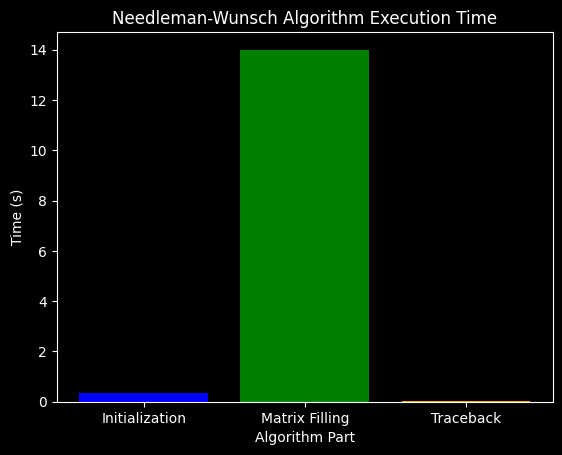

Similarity Percentage: 65.80129805292061
similarity percentage from our model: 85.13337670787247


In [ ]:
from collections import defaultdict
import time
import matplotlib.pyplot as plt

def read_sequences_from_file0(file_path):
    sequences = []
    names = []
    with open(file_path, 'r') as file:
        sequence = ""
        for line in file:
            if line.startswith('>Seq'):
                if sequence:
                    sequences.append(sequence)
                    sequence = ""  # Reset sequence for the next one
                # Extract the sequence name from the line
                name = line.split()[0].strip('>').rstrip()
                names.append(name)
            else:
                sequence += line.strip()
        sequences.append(sequence)  # Append the last sequence
    return names, sequences

def needleman_wunsch_3(seq1, seq2, match_score=1, mismatch_score=-1, gap_score=-2):
    # Needleman-Wunsch algorithm implementation
    start_time = time.time()

    # Initialization
    m, n = len(seq1), len(seq2)
    score_matrix = [[0] * (n+1) for _ in range(m+1)]
    traceback_matrix = [[''] * (n+1) for _ in range(m+1)]

    # Initialization of score and traceback matrices
    for i in range(m+1):
        score_matrix[i][0] = i * gap_score
        traceback_matrix[i][0] = '↑'  # vertical traceback
    for j in range(n+1):
        score_matrix[0][j] = j * gap_score
        traceback_matrix[0][j] = '←'  # horizontal traceback

    init_time = time.time() - start_time

    # Filling score and traceback matrices
    fill_start_time = time.time()
    for i in range(1, m+1):
        for j in range(1, n+1):
            match = score_matrix[i-1][j-1] + (match_score if seq1[i-1] == seq2[j-1] else mismatch_score)
            delete = score_matrix[i-1][j] + gap_score
            insert = score_matrix[i][j-1] + gap_score
            max_score = max(match, delete, insert)
            score_matrix[i][j] = max_score

            if max_score == match:
                traceback_matrix[i][j] = '↖'
            elif max_score == delete:
                traceback_matrix[i][j] = '↑'
            else:
                traceback_matrix[i][j] = '←'
    fill_time = time.time() - fill_start_time

    # Traceback
    traceback_start_time = time.time()
    align1, align2, alignment_string = '', '', ''
    i, j = m, n
    while i > 0 and j > 0:
        if traceback_matrix[i][j] == '↖':
            align1 += seq1[i-1]
            align2 += seq2[j-1]
            alignment_string += '|' if seq1[i-1] == seq2[j-1] else '.'
            i -= 1
            j -= 1
        elif traceback_matrix[i][j] == '↑':
            align1 += seq1[i-1]
            align2 += '-'
            alignment_string += ' '
            i -= 1
        elif traceback_matrix[i][j] == '←':
            align1 += '-'
            align2 += seq2[j-1]
            alignment_string += ' '
            j -= 1

    while i > 0:
        align1 += seq1[i-1]
        align2 += '-'
        alignment_string += ' '
        i -= 1
    while j > 0:
        align1 += '-'
        align2 += seq2[j-1]
        alignment_string += ' '
        j -= 1

    align1 = align1[::-1]
    align2 = align2[::-1]
    alignment_string = alignment_string[::-1]
    alignment_score = score_matrix[m][n]

    traceback_time = time.time() - traceback_start_time

    # Calculate similarity percentage
    matching_chars = sum(1 for a, b in zip(align1, align2) if a == b and a != '-')
    alignment_length = len(align1) - align1.count('-')
    similarity_percentage = (matching_chars / alignment_length) * 100 if alignment_length != 0 else 0

    return align1, alignment_string, align2, alignment_score, similarity_percentage, init_time, fill_time, traceback_time

def construct_debruijn_graph2(sequence1, sequence2, k):
    start_time = time.time()

    kmers1 = generate_kmers(sequence1, k)
    kmers2 = generate_kmers(sequence2, k)

    debruijn_graph = defaultdict(list)
    for kmer in kmers1 + kmers2:
        prefix = kmer[:-1]
        suffix = kmer[1:]
        debruijn_graph[prefix].append(suffix)

    construction_time = time.time() - start_time

    return debruijn_graph, construction_time

# Read sequences from the file
names, sequences = read_sequences_from_file0("protein3.txt")

# Perform alignment and construct De Bruijn graph for each unique pair of sequences
error = 0.0
num = 0
debruijn_construction_times = []
for i in range(len(sequences)):
    for j in range(i+1, len(sequences)):
        print(f"Alignment and De Bruijn graph for sequences {names[i]} and {names[j]}:")
        seq1 = sequences[i]
        seq2 = sequences[j]

        # Needleman-Wunsch alignment
        alignment = needleman_wunsch_3(seq1, seq2)
        print(f"Alignment for sequences {i+1} and {j+1}:")
        print(f"{alignment[0]}\n{alignment[1]}\n{alignment[2]}\n  Score={alignment[3]}\n")

        # Construct de Bruijn graph
        k = 3  # Change the value of k as needed
        debruijn_graph, construction_time = construct_debruijn_graph2(seq1, seq2, k)

        # Plotting time taken by each part
        init_time, fill_time, traceback_time = alignment[5], alignment[6], alignment[7]
        time_labels = ['Initialization', 'Matrix Filling', 'Traceback']
        time_values = [init_time, fill_time, traceback_time]

        plt.bar(time_labels, time_values, color=['blue', 'green', 'orange'])
        plt.xlabel('Algorithm Part')
        plt.ylabel('Time (s)')
        plt.title('Needleman-Wunsch Algorithm Execution Time')
        plt.show()

        # Calculate similarity percentage
        similarity_percentage = calculate_sequence_similarity(seq1, seq2)
        print("Similarity Percentage:", similarity_percentage)
        simm = needleman_wunsch_3(seq1, seq2)
        print(f"similarity percentage from our model: {simm[4]}")
        er = abs(similarity_percentage - simm[4]) / similarity_percentage
        error += er
        num += 1

        # Append construction time of De Bruijn graph
        debruijn_construction_times.append(construction_time)

# Calculate average construction time for De Bruijn graph
avg_debruijn_construction_time = sum(debruijn_construction_times) / len(debruijn_construction_times)


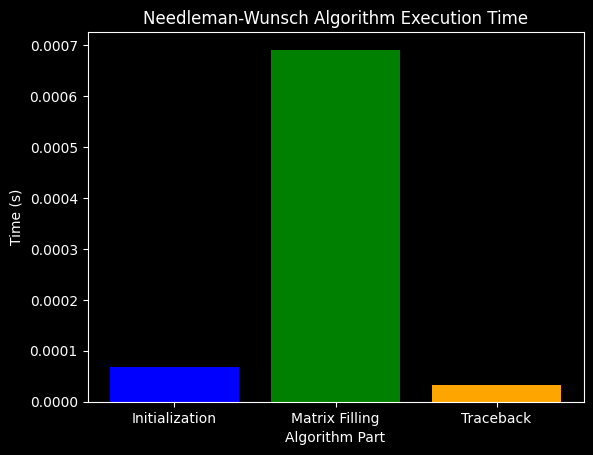

In [ ]:
import time
import matplotlib.pyplot as plt

def needleman_wunsch(seq1, seq2, match_score=1, mismatch_score=-1, gap_score=-2):
    # Needleman-Wunsch algorithm implementation
    m, n = len(seq1), len(seq2)
    start_time = time.time()

    # Initialization
    score_matrix = [[0] * (n+1) for _ in range(m+1)]
    traceback_matrix = [[''] * (n+1) for _ in range(m+1)]
    init_time = time.time() - start_time

    # Initialization of score and traceback matrices
    for i in range(m+1):
        score_matrix[i][0] = i * gap_score
        traceback_matrix[i][0] = '↑'  # vertical traceback
    for j in range(n+1):
        score_matrix[0][j] = j * gap_score
        traceback_matrix[0][j] = '←'  # horizontal traceback
    init_time += time.time() - start_time

    # Filling score and traceback matrices
    fill_start_time = time.time()
    for i in range(1, m+1):
        for j in range(1, n+1):
            match = score_matrix[i-1][j-1] + (match_score if seq1[i-1] == seq2[j-1] else mismatch_score)
            delete = score_matrix[i-1][j] + gap_score
            insert = score_matrix[i][j-1] + gap_score
            max_score = max(match, delete, insert)
            score_matrix[i][j] = max_score

            if max_score == match:
                traceback_matrix[i][j] = '↖'
            elif max_score == delete:
                traceback_matrix[i][j] = '↑'
            else:
                traceback_matrix[i][j] = '←'
    fill_time = time.time() - fill_start_time

    # Traceback
    traceback_start_time = time.time()
    align1, align2, alignment_string = '', '', ''
    i, j = m, n
    while i > 0 and j > 0:
        if traceback_matrix[i][j] == '↖':
            align1 += seq1[i-1]
            align2 += seq2[j-1]
            alignment_string += '|' if seq1[i-1] == seq2[j-1] else '.'
            i -= 1
            j -= 1
        elif traceback_matrix[i][j] == '↑':
            align1 += seq1[i-1]
            align2 += '-'
            alignment_string += ' '
            i -= 1
        elif traceback_matrix[i][j] == '←':
            align1 += '-'
            align2 += seq2[j-1]
            alignment_string += ' '
            j -= 1

    while i > 0:
        align1 += seq1[i-1]
        align2 += '-'
        alignment_string += ' '
        i -= 1
    while j > 0:
        align1 += '-'
        align2 += seq2[j-1]
        alignment_string += ' '
        j -= 1

    align1 = align1[::-1]
    align2 = align2[::-1]
    alignment_string = alignment_string[::-1]
    alignment_score = score_matrix[m][n]

    # Calculate similarity percentage
    matching_chars = sum(1 for a, b in zip(align1, align2) if a == b and a != '-')
    alignment_length = len(align1) - align1.count('-')
    similarity_percentage = (matching_chars / alignment_length) * 100 if alignment_length != 0 else 0

    traceback_time = time.time() - traceback_start_time
    return align1, alignment_string, align2, alignment_score, similarity_percentage, init_time, fill_time, traceback_time

# Input sequences
seq1 = "FDGFDGFDFGDGFDDCCFFTFYTFYTYTYTFYTFYFYFY"
seq2 = "ANHBHBHJVHGCFCHGVHJVGHCGD"

# Get alignment
alignment = needleman_wunsch(seq1, seq2)

# Plotting time taken by each part
init_time, fill_time, traceback_time = alignment[5], alignment[6], alignment[7]
time_labels = ['Initialization', 'Matrix Filling', 'Traceback']
time_values = [init_time, fill_time, traceback_time]

plt.bar(time_labels, time_values, color=['blue', 'green', 'orange'])
plt.xlabel('Algorithm Part')
plt.ylabel('Time (s)')
plt.title('Needleman-Wunsch Algorithm Execution Time')
plt.show()

In [ ]:
import time
import matplotlib.pyplot as plt

def read_sequences_from_file(file_path):
    sequences = []
    with open(file_path, 'r') as file:
        sequence = ""
        for line in file:
            if line.startswith('>Seq'):
                if sequence:
                    sequences.append(sequence)
                    sequence = ""  # Reset sequence for the next one
            else:
                sequence += line.strip()
        sequences.append(sequence)  # Append the last sequence
    return sequences

def needleman_wunsch(seq1, seq2, match_score=1, mismatch_score=-1, gap_score=-2):
    # Needleman-Wunsch algorithm implementation
    m, n = len(seq1), len(seq2)
    start_time = time.time()

    # Initialization
    score_matrix = [[0] * (n+1) for _ in range(m+1)]
    traceback_matrix = [[''] * (n+1) for _ in range(m+1)]
    init_time = time.time() - start_time

    # Initialization of score and traceback matrices
    for i in range(m+1):
        score_matrix[i][0] = i * gap_score
        traceback_matrix[i][0] = '↑'  # vertical traceback
    for j in range(n+1):
        score_matrix[0][j] = j * gap_score
        traceback_matrix[0][j] = '←'  # horizontal traceback

    # Filling score and traceback matrices
    fill_start_time = time.time()
    for i in range(1, m+1):
        for j in range(1, n+1):
            match = score_matrix[i-1][j-1] + (match_score if seq1[i-1] == seq2[j-1] else mismatch_score)
            delete = score_matrix[i-1][j] + gap_score
            insert = score_matrix[i][j-1] + gap_score
            max_score = max(match, delete, insert)
            score_matrix[i][j] = max_score

            if max_score == match:
                traceback_matrix[i][j] = '↖'
            elif max_score == delete:
                traceback_matrix[i][j] = '↑'
            else:
                traceback_matrix[i][j] = '←'
    fill_time = time.time() - fill_start_time

    # Traceback
    traceback_start_time = time.time()
    align1, align2, alignment_string = '', '', ''
    i, j = m, n
    while i > 0 and j > 0:
        if traceback_matrix[i][j] == '↖':
            align1 += seq1[i-1]
            align2 += seq2[j-1]
            alignment_string += '|' if seq1[i-1] == seq2[j-1] else '.'
            i -= 1
            j -= 1
        elif traceback_matrix[i][j] == '↑':
            align1 += seq1[i-1]
            align2 += '-'
            alignment_string += ' '
            i -= 1
        elif traceback_matrix[i][j] == '←':
            align1 += '-'
            align2 += seq2[j-1]
            alignment_string += ' '
            j -= 1

    while i > 0:
        align1 += seq1[i-1]
        align2 += '-'
        alignment_string += ' '
        i -= 1
    while j > 0:
        align1 += '-'
        align2 += seq2[j-1]
        alignment_string += ' '
        j -= 1

    align1 = align1[::-1]
    align2 = align2[::-1]
    alignment_string = alignment_string[::-1]
    alignment_score = score_matrix[m][n]

    # Calculate similarity percentage
    matching_chars = sum(1 for a, b in zip(align1, align2) if a == b and a != '-')
    alignment_length = len(align1) - align1.count('-')
    similarity_percentage = (matching_chars / alignment_length) * 100 if alignment_length != 0 else 0

    traceback_time = time.time() - traceback_start_time
    return align1, alignment_string, align2, alignment_score, similarity_percentage, init_time, fill_time, traceback_time

# Read sequences from file
file_path = "protein3.txt"
sequences = read_sequences_from_file(file_path)

# Input sequences
seq1, seq2 = sequences[0], sequences[1]

# Get alignment
alignment = needleman_wunsch(seq1, seq2)

# Plotting time taken by each part
init_time, fill_time, traceback_time = alignment[5], alignment[6], alignment[7]
time_labels = ['Initialization', 'Matrix Filling', 'Traceback']
time_values = [init_time, fill_time, traceback_time]

plt.bar(time_labels, time_values, color=['blue', 'green', 'orange'])
plt.xlabel('Algorithm Part')
plt.ylabel('Time (s)')
plt.title('Needleman-Wunsch Algorithm Execution Time')
plt.show()
